In [14]:
#Probability Distributions

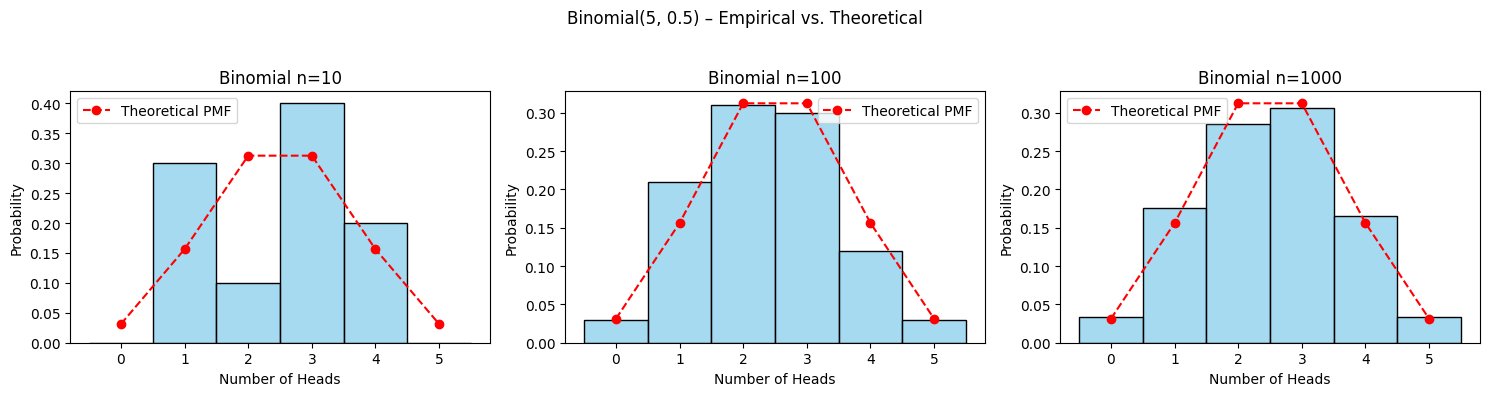

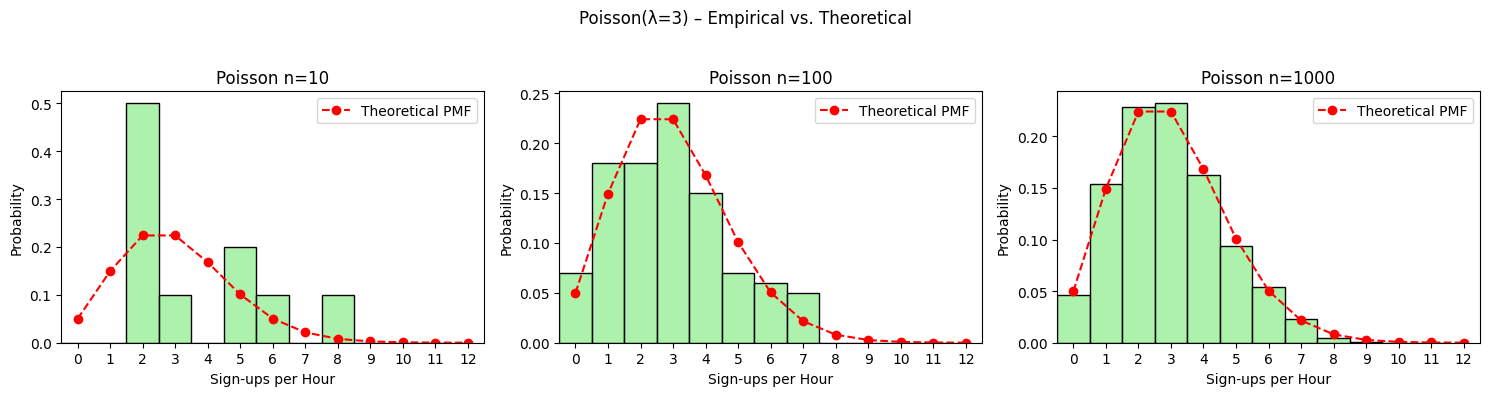

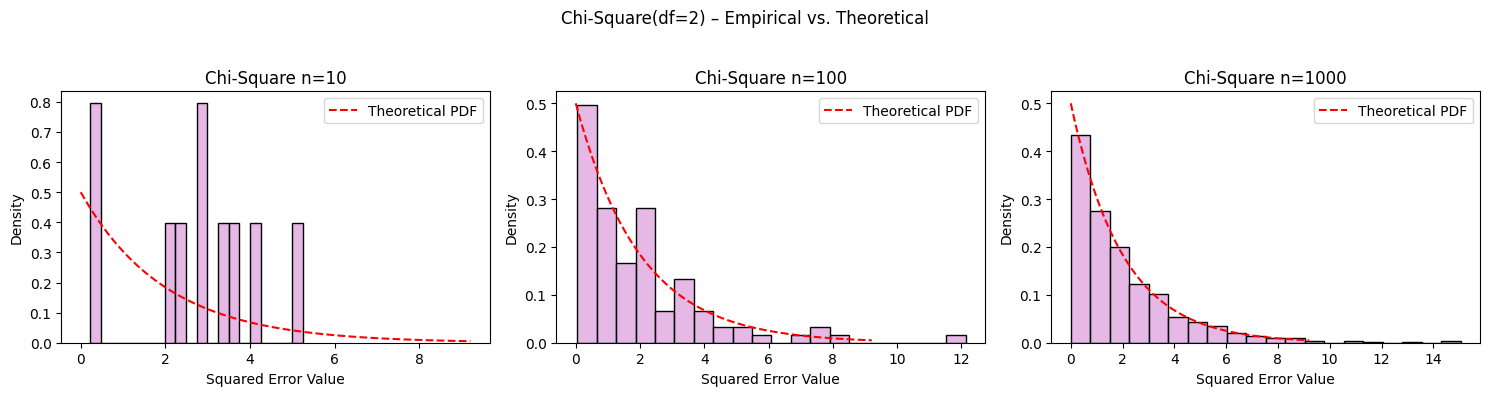

Simulations and plots completed.


In [15]:
# Simulations and comparison with theoretical distributions
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import binom, poisson, chi2

# Ensure reproducibility
np.random.seed(42)

# ------- 1. Binomial Distribution (coin tossed 5 times) ---------
trials = 5
sample_sizes = [10, 100, 1000]

fig, axes = plt.subplots(1, 3, figsize=(15, 4))
for ax, n in zip(axes, sample_sizes):
    samples = np.random.binomial(trials, 0.5, size=n)
    # Empirical distribution
    sns.histplot(samples, bins=np.arange(-0.5, trials + 1.5, 1), stat='probability', ax=ax, color='skyblue', edgecolor='black')
    # Theoretical pmf
    x_vals = np.arange(0, trials + 1)
    ax.plot(x_vals, binom.pmf(x_vals, trials, 0.5), marker='o', linestyle='--', color='red', label='Theoretical PMF')
    ax.set_title('Binomial n=' + str(n))
    ax.set_xlabel('Number of Heads')
    ax.set_ylabel('Probability')
    ax.set_xticks(x_vals)
    ax.legend()
plt.suptitle('Binomial(5, 0.5) – Empirical vs. Theoretical')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# ------- 2. Poisson Distribution (λ = 3 sign-ups per hour) ---------
lambda_val = 3
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
for ax, n in zip(axes, sample_sizes):
    samples = np.random.poisson(lambda_val, size=n)
    sns.histplot(samples, bins=np.arange(-0.5, 12.5, 1), stat='probability', ax=ax, color='lightgreen', edgecolor='black')
    x_vals = np.arange(0, 13)
    ax.plot(x_vals, poisson.pmf(x_vals, lambda_val), marker='o', linestyle='--', color='red', label='Theoretical PMF')
    ax.set_title('Poisson n=' + str(n))
    ax.set_xlabel('Sign-ups per Hour')
    ax.set_ylabel('Probability')
    ax.set_xticks(x_vals)
    ax.set_xlim(-0.5, 12.5)
    ax.legend()
plt.suptitle('Poisson(λ=3) – Empirical vs. Theoretical')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# ------- 3. Chi-Square Distribution (df = 2) ---------
degrees_freedom = 2
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
for ax, n in zip(axes, sample_sizes):
    samples = np.random.chisquare(df=degrees_freedom, size=n)
    # Empirical histogram
    sns.histplot(samples, bins=20, stat='density', ax=ax, color='plum', edgecolor='black')
    # Theoretical pdf
    x_vals = np.linspace(0, chi2.ppf(0.99, degrees_freedom), 200)
    ax.plot(x_vals, chi2.pdf(x_vals, degrees_freedom), color='red', linestyle='--', label='Theoretical PDF')
    ax.set_title('Chi-Square n=' + str(n))
    ax.set_xlabel('Squared Error Value')
    ax.set_ylabel('Density')
    ax.legend()
plt.suptitle('Chi-Square(df=2) – Empirical vs. Theoretical')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

print('Simulations and plots completed.')

In [16]:
#Hypothesis Testing

In [17]:
# Load data and perform requested hypothesis tests
import pandas as pd
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Load the cleaned car sales dataset
car_df = pd.read_csv('car_sales_cleaned.csv', encoding='Windows-1252')

toyota_prices = car_df.loc[car_df['make'].str.lower() == 'toyota', 'sellingprice']

t_stat, p_val = stats.ttest_1samp(toyota_prices, popmean=12400, nan_policy='omit')

print('Toyota cars counted:', toyota_prices.shape[0])
print('Mean resale price: ', np.round(toyota_prices.mean(), 2))
print('t-statistic:', np.round(t_stat, 3))
print('p-value:', np.round(p_val, 4))

black_cars = car_df[(car_df['color'].str.lower() == 'black') & (~car_df['sellingprice'].isna())]

black_sample = black_cars.sample(n=min(5000, black_cars.shape[0]), random_state=42)

model = ols('sellingprice ~ C(body) + C(transmission) + C(body):C(transmission)', data=black_sample).fit()

anova_table = sm.stats.anova_lm(model, typ=2)
print('\
Two-Way ANOVA results (black cars, n=' + str(black_sample.shape[0]) + '):')
print(anova_table)

color_overall = car_df['color'].value_counts()
color_toyota = car_df.loc[car_df['make'].str.lower() == 'toyota', 'color'].value_counts()

color_df = pd.DataFrame({'All_Cars': color_overall, 'Toyota': color_toyota}).fillna(0)

chi2_stat, chi2_p, dof, expected = stats.chi2_contingency(color_df.T)

print('\
Chi-Square test:')
print('chi2 statistic:', np.round(chi2_stat, 2), '  dof:', dof, '  p-value:', np.round(chi2_p, 4))

# Show contingency head
print(color_df.head())



Toyota cars counted: 38991
Mean resale price:  12362.09
t-statistic: -1.073
p-value: 0.2833
Two-Way ANOVA results (black cars, n=5000):
                               sum_sq      df          F        PR(>F)
C(body)                  1.367775e+11    48.0  27.246159  5.844324e-97
C(transmission)          7.914500e+08     2.0   3.783777  2.280310e-02
C(body):C(transmission)  1.492246e+10    96.0   1.486281  7.081858e-03
Residual                 5.126740e+11  4902.0        NaN           NaN
Chi-Square test:
chi2 statistic: 3064.8   dof: 19   p-value: 0.0
          All_Cars  Toyota
color                     
beige         8591   820.0
black       106599  5880.0
blue         48532  3287.0
brown         6493   275.0
burgundy      8501   389.0


C:\Users\nikke\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 48, but rank is 20
  warnings.warn('covariance of constraints does not have full '
C:\Users\nikke\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 96, but rank is 65
  warnings.warn('covariance of constraints does not have full '
